In [1]:
!pip install qiskit==0.46
!pip install qiskit_aer
!pip install qiskit_machine_learning
!pip install tensorflow torch torchvision matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linu

In [2]:
!pip install pylatexenc
!pip install qiskit pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=a419ea137d556a48f27b9923df51a6d2e9dd70a58930cd0ac86a194b8ee73eab
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [3]:
import tensorflow as tf
from qiskit_aer import Aer
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import qiskit
from qiskit import execute
from qiskit.circuit import QuantumCircuit, Parameter
# from qiskit_machine_learning.neural_networks import CircuitQNN
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from qiskit import  QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_machine_learning.neural_networks import SamplerQNN
import torch.nn as nn
import torch.optim as optim
import os


In [4]:
import zipfile
import os

zip_path = '/content/small test data brain.zip'
extracted_path = '/content/brain_mri'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [10]:
data_dir = '/content/small test data brain'  # Change to your dataset path

# Image data generator for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 48 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


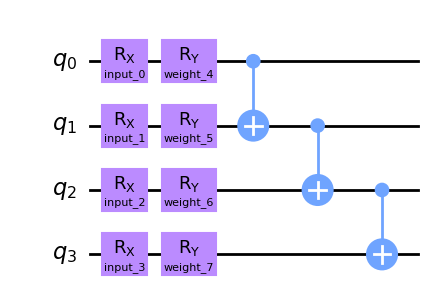

In [11]:
def create_quantum_circuit(n_qubits, n_params):
    input_params = [Parameter(f'input_{i}') for i in range(n_qubits)]
    weight_params = [Parameter(f'weight_{i}') for i in range(n_qubits, n_qubits + n_params)]
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.rx(input_params[i], i)
    for i in range(n_qubits):
        qc.ry(weight_params[i], i)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    return qc, input_params, weight_params

n_qubits = 4
n_params = 4  # The number of weight parameters should match the number of qubits
quantum_circuit, input_params, weight_params = create_quantum_circuit(n_qubits, n_params)
quantum_circuit.draw(output='mpl')

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


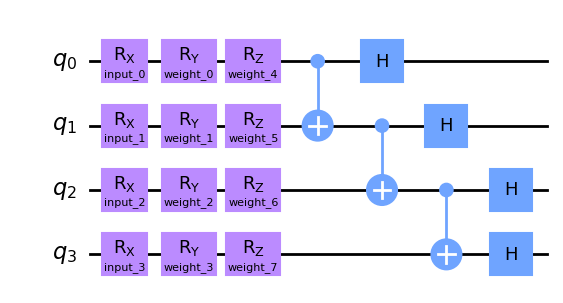

In [ ]:
def create_quantum_circuit(n_qubits):
    input_params = [Parameter(f'input_{i}') for i in range(n_qubits)]
    weight_params = [Parameter(f'weight_{i}') for i in range(0, 8)]
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.rx(input_params[i], i)
    for i in range(n_qubits):
        qc.ry(weight_params[i], i)
    for i in range(n_qubits):
        qc.rz(weight_params[i+n_qubits], i)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    for i in range(n_qubits):
        qc.h(i)
    return qc, input_params, weight_params

n_qubits = 4
quantum_circuit, input_params, weight_params = create_quantum_circuit(n_qubits)
quantum_circuit.draw(output='mpl')

In [12]:
from qiskit.primitives import Sampler
# Convert quantum circuit to a quantum neural network

# Use the statevector simulator as the backend
sampler = Sampler()

# Specify the correct output shape (number of qubits)
output_shape = 2  # We need to ensure the QNN outputs a shape compatible with fc2

# Convert quantum circuit to a quantum neural network
qnn = SamplerQNN(circuit=quantum_circuit, sampler=sampler, input_params=input_params, weight_params=weight_params, output_shape=(output_shape,))

# Convert QNN to a PyTorch compatible format
qnn_torch = TorchConnector(qnn)


# Define a PyTorch neural network with the quantum circuit
class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        self.fc1 = nn.Linear(128 * 128 * 3, n_qubits)
        self.qnn = qnn_torch
        self.fc2 = nn.Linear(16, 2)  # Match the actual QNN output shape
        self.fc3 = nn.Linear(2, 1)   # Final layer for binary classification

    def forward(self, x):
        x = x.view(-1, 128 * 128 * 3)  # Flatten the image input
        print(f"Shape after flattening: {x.shape}")
        x = torch.tanh(self.fc1(x))
        print(f"Shape after fc1: {x.shape}")
        x = self.qnn(x)  # QNN expects a specific input shape
        print(f"Shape after QNN: {x.shape}")
        x = torch.tanh(self.fc2(x))  # Additional layer to handle QNN output shape
        print(f"Shape after fc2: {x.shape}")
        x = torch.sigmoid(self.fc3(x))
        print(f"Shape after fc3: {x.shape}")
        return x

hybrid_model = HybridModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(hybrid_model.parameters(), lr=0.001)


In [13]:
# Training loop
num_epochs = 10
max_batches_per_epoch = 100  # Limit the number of batches per epoch
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_generator):
        if i >= max_batches_per_epoch:
            break
        inputs = torch.tensor(inputs, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.float32).view(-1, 1)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = hybrid_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:  # Print every 10 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 10}')
            running_loss = 0.0

print('Finished Training')

Streaming output truncated to the last 5000 lines.
Epoch 1, Batch 20, Loss: 0.6961713612079621
Shape after flattening: torch.Size([32, 49152])
Shape after fc1: torch.Size([32, 4])
Shape after QNN: torch.Size([32, 16])
Shape after fc2: torch.Size([32, 2])
Shape after fc3: torch.Size([32, 1])
Shape after flattening: torch.Size([16, 49152])
Shape after fc1: torch.Size([16, 4])
Shape after QNN: torch.Size([16, 16])
Shape after fc2: torch.Size([16, 2])
Shape after fc3: torch.Size([16, 1])
Shape after flattening: torch.Size([32, 49152])
Shape after fc1: torch.Size([32, 4])
Shape after QNN: torch.Size([32, 16])
Shape after fc2: torch.Size([32, 2])
Shape after fc3: torch.Size([32, 1])
Shape after flattening: torch.Size([16, 49152])
Shape after fc1: torch.Size([16, 4])
Shape after QNN: torch.Size([16, 16])
Shape after fc2: torch.Size([16, 2])
Shape after fc3: torch.Size([16, 1])
Shape after flattening: torch.Size([32, 49152])
Shape after fc1: torch.Size([32, 4])
Shape after QNN: torch.Size([32,

In [14]:
from sklearn.metrics import recall_score, f1_score
# Convert validation data to tensors
val_images, val_labels = next(iter(validation_generator))
val_images = torch.tensor(val_images, dtype=torch.float32)
val_labels = torch.tensor(val_labels, dtype=torch.float32).view(-1, 1)

# Evaluate the model
outputs = hybrid_model(val_images)
predicted = (outputs > 0.5).float()

accuracy = (predicted == val_labels).float().mean()
recall = recall_score(val_labels, predicted)
f1 = f1_score(val_labels, predicted)

print(f'Accuracy: {accuracy.item() * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Shape after flattening: torch.Size([12, 49152])
Shape after fc1: torch.Size([12, 4])
Shape after QNN: torch.Size([12, 16])
Shape after fc2: torch.Size([12, 2])
Shape after fc3: torch.Size([12, 1])
Accuracy: 75.00%
Recall: 0.83
F1 Score: 0.77
